In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

import numpy as np
import pandas as pd
from math import sqrt

from bayes_opt import BayesianOptimization
from bayes_opt import UtilityFunction

import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

In [3]:
def black_box_f(x):
    
    val =  x * (30-2*x) * (20-2*x)

    return val

In [7]:
# x 값의 범위를 지정해주세요
p_bounds = {'x':(5,7)}

#아래는 Bayesian 을 셋팅하는 구간입니다.
opt_1 = BayesianOptimization(f=black_box_f, pbounds=p_bounds, random_state=1, allow_duplicate_points=True)
opt_1.maximize( init_points=5, n_iter=10)

|   iter    |  target   |     x     |
-------------------------------------
| 1         | 891.1     | 5.834     |
| 2         | 784.9     | 6.441     |
| 3         | 1e+03     | 5.0       |
| 4         | 925.8     | 5.605     |
| 5         | 967.3     | 5.294     |
| 6         | 1e+03     | 5.0       |
Data point [5.] is not unique. 1 duplicates registered. Continuing ...
| 7         | 1e+03     | 5.0       |
Data point [5.] is not unique. 2 duplicates registered. Continuing ...
| 8         | 1e+03     | 5.0       |
Data point [5.] is not unique. 3 duplicates registered. Continuing ...
| 9         | 1e+03     | 5.0       |
Data point [5.] is not unique. 4 duplicates registered. Continuing ...
| 10        | 1e+03     | 5.0       |
Data point [5.] is not unique. 5 duplicates registered. Continuing ...
| 11        | 1e+03     | 5.0       |
Data point [5.] is not unique. 6 duplicates registered. Continuing ...
| 12        | 1e+03     | 5.0       |
Data point [5.] is not unique. 7 duplicate

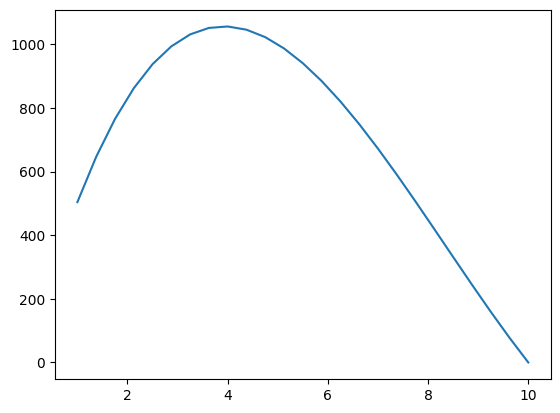

In [8]:
x = np.linspace(1, 10, 25).reshape(-1, 1)
y = black_box_f(x)

plt.plot(x, y);

In [9]:
# 10w 데이터 불러오기
data = pd.read_csv('boston_housing.csv')

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
feature_columns = list(data.columns.difference(['PRICE'])) # price-target, 그 외 feature
X = data[feature_columns]
y = data['PRICE']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42) 
# train/test 비율을 7:3

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape) # 데이터 확인

(354, 13) (152, 13) (354,) (152,)


In [11]:
m_f = 5
n_d = 80
n_t = 20
    
model = RandomForestRegressor(n_estimators=int(n_t),
                              max_depth=int(n_d), max_features=int(m_f),
                              oob_score=False, random_state=123)
model.fit(train_x, train_y)
model_predict = model.predict(test_x) # test data 예측

print("RMSE: {}".format(sqrt(mean_squared_error(model_predict, test_y)))) # RMSE

RMSE: 3.2143683129529186


In [12]:
def black_box_function(n_t, n_d, m_f):
    #RandomForestClassifier 클래스를 import
    from sklearn.ensemble import RandomForestClassifier

    model = RandomForestRegressor(n_estimators=int(n_t),
                              max_depth=int(n_d), max_features=int(m_f),
                              oob_score=False, random_state=123)
    model.fit(train_x, train_y)
    model_predict = model.predict(test_x) # test data 예측

    return -sqrt(mean_squared_error(model_predict, test_y))


# Bounded region of parameter space
pbounds = {'n_t':(10,100) ,'n_d': (2, 100), 'm_f': (3, 13)}

optimizer = BayesianOptimization(
    f=black_box_function,
    pbounds=pbounds,
    random_state=1,
)        

optimizer.maximize(
    init_points=15,
    n_iter=20,
)

|   iter    |  target   |    m_f    |    n_d    |    n_t    |
-------------------------------------------------------------
| 1         | -3.275    | 7.17      | 72.59     | 10.01     |
| 2         | -3.168    | 6.023     | 16.38     | 18.31     |
| 3         | -3.232    | 4.863     | 35.86     | 45.71     |
| 4         | -3.116    | 8.388     | 43.08     | 71.67     |
| 5         | -3.248    | 5.045     | 88.06     | 12.46     |
| 6         | -3.105    | 9.705     | 42.9      | 60.28     |
| 7         | -3.203    | 4.404     | 21.41     | 82.07     |
| 8         | -3.116    | 12.68     | 32.72     | 72.31     |
| 9         | -2.966    | 11.76     | 89.67     | 17.65     |
| 10        | -3.241    | 3.391     | 18.64     | 89.03     |
| 11        | -3.197    | 3.983     | 43.27     | 96.21     |
| 12        | -3.08     | 8.332     | 69.8      | 38.4      |
| 13        | -3.109    | 9.865     | 83.79     | 11.65     |
| 14        | -3.04     | 10.5      | 98.91     | 77.33     |
| 15    

In [13]:
m_f = 11
n_d = 89
n_t = 17
    
model = RandomForestRegressor(n_estimators=int(n_t),
                              max_depth=int(n_d), max_features=int(m_f),
                              oob_score=False, random_state=123)
model.fit(train_x, train_y)
model_predict = model.predict(test_x) # test data 예측

print("RMSE: {}".format(sqrt(mean_squared_error(model_predict, test_y)))) # RMSE

RMSE: 2.9660830104187843
